<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_3%EC%9E%A5_%EB%82%98%EB%AC%B4%EB%AA%A8%ED%98%95(%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류나무모형(타이타닉 데이터 & 독일신용평가 데이터)
가장 대중적인 모형인 CART방법으로 의사결정트리 구축

##데이터 읽기 : 타이타닉데이터


In [1]:
#데이터 가져오기
url_titanic = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/titanic.csv"
titanic = read.csv(url_titanic, header =T)
attach(titanic)
head(titanic)

,Class,Age,Sex,Survived
,<chr>,<chr>,<chr>,<chr>
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes
5,First,Adult,Male,Yes
6,First,Adult,Male,Yes


In [2]:
#데이터 요약
summary(titanic)

    Class               Age                Sex              Survived        
 Length:2201        Length:2201        Length:2201        Length:2201       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

## CART 나무모형 실행
패키지 : rpart
>
* 목표변수 : Survived 변수
* 입력변수 : 나머지변수

* minsplit = 1 : 중간노드를 분할하기 위한 최소 자료의 수, 이 값보다 적은 개수의 관측치가 있으면 노드를 분할하지 않음
* cp : cost-complexity의 약어로 비용복잡함수에서 a값을 의미함.
* cp = 0이면 오분류울값이 최솟값이 될 때까지 계속 분할하라는 뜻이 됨
* cp =  0.1이면 a=0.1에 해당하는 비용복잡함수의 최솟값이 될 때까지만 계속 분할하라는 뜻
* cp = -0.01이면 설사 비용복잡함수가 현상유지하지 못하고 미세하게 증가하더라도 계속적으로 나무모형을 구축하도록 하라는 뜻
* xval : 가지치기에 필요한 cross-validation의 약어로 xval = 10이면 10-fold 교차타당성 오분류율로 계산하게됨



In [3]:
#패키지 가져오기
library(rpart)

In [4]:
#옵션 선택
my.control <- rpart.control(xval = 10, cp = -0.01, minsplit = 1)
#CART나무모형 실행 (가지치기전이라 모형이 매우 큼)
fit.titanic <- rpart(Survived ~ ., data = titanic, method = "class", control = my.control)
print(fit.titanic)

n= 2201 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2201 711 No (0.67696502 0.32303498)  
   2) Sex=Male 1731 367 No (0.78798382 0.21201618)  
     4) Age=Adult 1667 338 No (0.79724055 0.20275945)  
       8) Class=Second,Third 630  89 No (0.85873016 0.14126984)  
        16) Class=Second 168  14 No (0.91666667 0.08333333) *
        17) Class=Third 462  75 No (0.83766234 0.16233766) *
       9) Class=Crew,First 1037 249 No (0.75988428 0.24011572)  
        18) Class=Crew 862 192 No (0.77726218 0.22273782) *
        19) Class=First 175  57 No (0.67428571 0.32571429) *
     5) Age=Child 64  29 No (0.54687500 0.45312500)  
      10) Class=Third 48  13 No (0.72916667 0.27083333) *
      11) Class=First,Second 16   0 Yes (0.00000000 1.00000000) *
   3) Sex=Female 470 126 Yes (0.26808511 0.73191489)  
     6) Class=Third 196  90 No (0.54081633 0.45918367)  
      12) Age=Child 31  14 No (0.54838710 0.45161290) *
      13) Age=Adult 165  76 No (0.53939394 0.

> 설명
* 아직 가지치기 전 상태임임

In [5]:
#나무모형 구축 과정 결과
printcp(fit.titanic)


Classification tree:
rpart(formula = Survived ~ ., data = titanic, method = "class", 
    control = my.control)

Variables actually used in tree construction:
[1] Age   Class Sex  

Root node error: 711/2201 = 0.32303

n= 2201 

         CP nsplit rel error  xerror     xstd
1  0.306610      0   1.00000 1.00000 0.030857
2  0.022504      1   0.69339 0.69339 0.027510
3  0.011252      2   0.67089 0.70183 0.027628
4  0.000000      4   0.64838 0.65401 0.026935
5 -0.010000     12   0.64838 0.65401 0.026935


설명
>
* 뿌리노드가 최종노드가 갈때 갖게되는 cp의 값(비용복잡함수의 a)은 0.3066임
* 중간노드를 계속 분할하려면 cp값은 적은 값이어야 하므로 cp = -0.01일때는 분할의 횟수가 12회인 규모가 상당히 큰 나무구조가 도출됨을 알 수 있고, 이 단계에 해당하는 나무구조가 최대나무이다
* xerror는 교차타당성 방법에 의한 오분류울을 의미하므로 xerror의 최솟값은 분할 횟수가 4번째인 경우 이며 cp가 0이다
* 따라서 cp=0(a=0)일 때 교차타당성 오분류율을 최소화시키는 최적의 나무사이즈 이므로 이 값을 기준으로 가지치기를 진행해야한다

## 가지치기

In [7]:
#cp=0일 때 최적의 나무사이즈임
fit.prun.titanic <- prune(fit.titanic, cp=0.0)
print(fit.prun.titanic)

n= 2201 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2201 711 No (0.6769650 0.3230350)  
   2) Sex=Male 1731 367 No (0.7879838 0.2120162)  
     4) Age=Adult 1667 338 No (0.7972406 0.2027594) *
     5) Age=Child 64  29 No (0.5468750 0.4531250)  
      10) Class=Third 48  13 No (0.7291667 0.2708333) *
      11) Class=First,Second 16   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 470 126 Yes (0.2680851 0.7319149)  
     6) Class=Third 196  90 No (0.5408163 0.4591837) *
     7) Class=Crew,First,Second 274  20 Yes (0.0729927 0.9270073) *


설명
>
제공되는 정보 순서 : 
1. 노드번호, 
2. 분할규칙, 
3. 해당 노드이 총 관측치 수, 
4. 해당 노드에서 오분류되는 관측치의 수, 
5. 해당 노드의 목표변수 예측치, 
6. 괄호: 목표변수의 집단별 비율, 
7. * : 해당 노드가 최종노드임을 의미


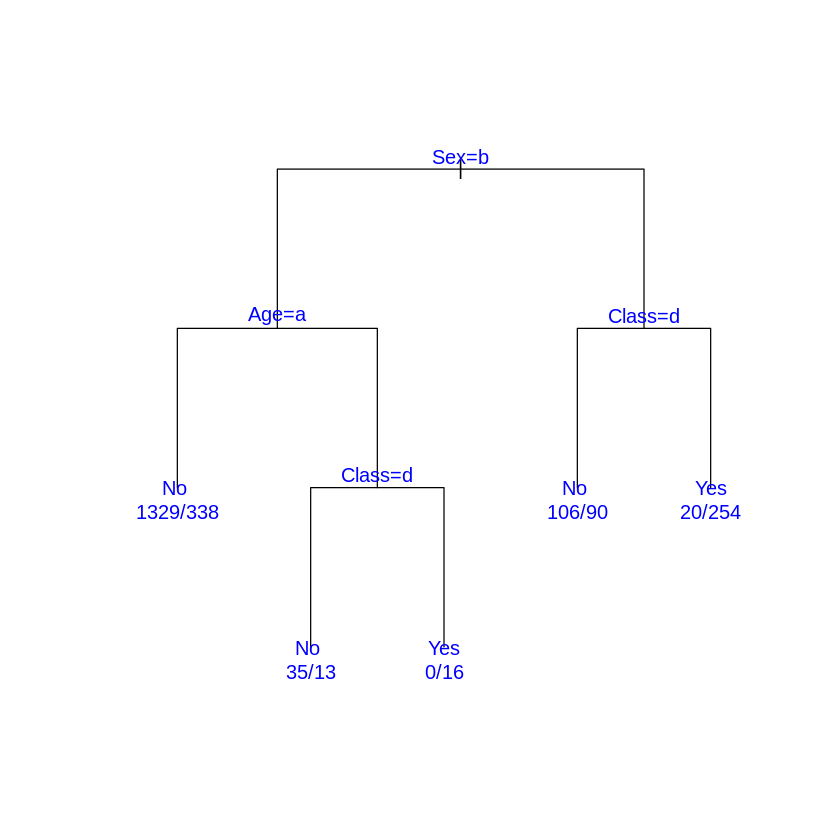

In [9]:
#가지치기한 나무모형 시각화
plot(fit.prun.titanic, uniform = T, compress = T, margin = 0.1)
text(fit.prun.titanic, use.n = T, col = "blue")

명령어 설명
>
* uniform : 가로폭 크기 좁히기
* compress : 세로폭의 크기 좁히기
* margin : 여백설정
* text : 나무모형에 변수값 출력
* use.n : 집단별 관측치의 수
* sex = b : 왼쪽 가지로 가는 조건이 무엇인지 알려주는 것, summary(titanic)에서 sex의 변수에서 male은 두번째 범주임임으로 b임, 따라서 남성이 왼쪽 노드임


In [10]:
#가지치기된 모형의 구체적 사항 모두 출력
summary(fit.prun.titanic)

Call:
rpart(formula = Survived ~ ., data = titanic, method = "class", 
    control = my.control)
  n= 2201 

          CP nsplit rel error    xerror       xstd
1 0.30661041      0 1.0000000 1.0000000 0.03085662
2 0.02250352      1 0.6933896 0.6933896 0.02750982
3 0.01125176      2 0.6708861 0.7018284 0.02762806
4 0.00000000      4 0.6483826 0.6540084 0.02693529

Variable importance
  Sex Class   Age 
   73    23     4 

Node number 1: 2201 observations,    complexity param=0.3066104
  predicted class=No   expected loss=0.323035  P(node) =1
    class counts:  1490   711
   probabilities: 0.677 0.323 
  left son=2 (1731 obs) right son=3 (470 obs)
  Primary splits:
      Sex   splits as  RL,   improve=199.821600, (0 missing)
      Class splits as  LRRL, improve= 69.684100, (0 missing)
      Age   splits as  LR,   improve=  9.165241, (0 missing)

Node number 2: 1731 observations,    complexity param=0.01125176
  predicted class=No   expected loss=0.2120162  P(node) =0.7864607
    class cou

## 데이터 읽기(독일신용평가데이터)


In [19]:
#데이터 가져오기
url_german = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt"
german = read.table(url_german, header =T)
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)
attach(german)
head(german)

The following objects are masked _by_ .GlobalEnv:

    numcredits, residence, residpeople


The following objects are masked from german (pos = 3):

    age, check, credit, debtors, duration, employment, foreign,
    history, housing, installment, job, numcredits, others, personal,
    property, purpose, residence, residpeople, savings, telephone, y


The following objects are masked from german (pos = 4):

    age, check, credit, debtors, duration, employment, foreign,
    history, housing, installment, job, numcredits, others, personal,
    property, purpose, residence, residpeople, savings, telephone, y


The following objects are masked from german (pos = 5):

    age, check, credit, debtors, duration, employment, foreign,
    history, housing, installment, job, numcredits, others, personal,
    property, purpose, residence, residpeople, savings, telephone, y


The following objects are masked from german (pos = 6):

    age, check, credit, debtors, duration, employment, foreign,
 

,check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<fct>,<chr>,<fct>,<chr>,<chr>,<chr>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good


In [20]:
#데이터 요약
summary(german)

    check              duration      history            purpose         
 Length:1000        Min.   : 4.0   Length:1000        Length:1000       
 Class :character   1st Qu.:12.0   Class :character   Class :character  
 Mode  :character   Median :18.0   Mode  :character   Mode  :character  
                    Mean   :20.9                                        
                    3rd Qu.:24.0                                        
                    Max.   :72.0                                        
     credit        savings           employment         installment   
 Min.   :  250   Length:1000        Length:1000        Min.   :1.000  
 1st Qu.: 1366   Class :character   Class :character   1st Qu.:2.000  
 Median : 2320   Mode  :character   Mode  :character   Median :3.000  
 Mean   : 3271                                         Mean   :2.973  
 3rd Qu.: 3972                                         3rd Qu.:4.000  
 Max.   :18424                                         Max.   :

##CART 나무모형 실행
>
* 중간노드를 분할하는 최소 자료수 : 5
* a=0으로 하여 오분류값이 최소가 될 때까지 분할
* 10-fold 교차타당성 수행해 최적의 cp값 찾도록함

In [21]:
my.control.german <- rpart.control(xcal = 10, cp=0, minsplit = 5)
fit.german <- rpart(y ~ ., data = german, method = "class", control = my.control.german)
print(fit.german)

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

    1) root 1000 300 good (0.300000000 0.700000000)  
      2) check=A11,A12 543 240 good (0.441988950 0.558011050)  
        4) duration>=22.5 237 103 bad (0.565400844 0.434599156)  
          8) savings=A61,A62,A63 196  74 bad (0.622448980 0.377551020)  
           16) duration>=47.5 36   5 bad (0.861111111 0.138888889)  
             32) residence=2,4 30   2 bad (0.933333333 0.066666667)  
               64) history=A30,A32,A34 24   0 bad (1.000000000 0.000000000) *
               65) history=A31,A33 6   2 bad (0.666666667 0.333333333)  
                130) age>=34 4   0 bad (1.000000000 0.000000000) *
                131) age< 34 2   0 good (0.000000000 1.000000000) *
             33) residence=1,3 6   3 bad (0.500000000 0.500000000)  
               66) purpose=A42,A43,A49 3   0 bad (1.000000000 0.000000000) *
               67) purpose=A40,A41,A46 3   0 good (0.000000000 1.000000000) *
           17) d

In [22]:
#모든 cp값에 대한 나무모형 성능 결과
printcp(fit.german)


Classification tree:
rpart(formula = y ~ ., data = german, method = "class", control = my.control.german)

Variables actually used in tree construction:
 [1] age         check       credit      debtors     duration    employment 
 [7] history     housing     installment job         numcredits  others     
[13] personal    property    purpose     residence   savings    

Root node error: 300/1000 = 0.3

n= 1000 

          CP nsplit rel error  xerror     xstd
1  0.0516667      0   1.00000 1.00000 0.048305
2  0.0466667      3   0.84000 0.99667 0.048258
3  0.0183333      4   0.79333 0.86000 0.046120
4  0.0166667      6   0.75667 0.86333 0.046178
5  0.0155556      8   0.72333 0.87667 0.046408
6  0.0116667     11   0.67667 0.88000 0.046464
7  0.0100000     13   0.65333 0.86667 0.046236
8  0.0083333     16   0.62333 0.89333 0.046688
9  0.0066667     18   0.60667 0.91667 0.047067
10 0.0060000     38   0.44333 0.94000 0.047431
11 0.0050000     43   0.41333 0.98667 0.048118
12 0.0044444     55

해석
>
* 오분류율이 최소가 되는 것은 3번째단계 4번 분리할 때임(오분류율 = 0.86)

In [23]:
#가지치기 실행
fit.prun.german <- prune(fit.german, cp = 0.0183333)
print(fit.prun.german)

n= 1000 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1000 300 good (0.3000000 0.7000000)  
   2) check=A11,A12 543 240 good (0.4419890 0.5580110)  
     4) duration>=22.5 237 103 bad (0.5654008 0.4345992)  
       8) savings=A61,A62,A63 196  74 bad (0.6224490 0.3775510)  
        16) duration>=47.5 36   5 bad (0.8611111 0.1388889) *
        17) duration< 47.5 160  69 bad (0.5687500 0.4312500)  
          34) purpose=A40,A410,A42,A43,A45,A46,A49 137  52 bad (0.6204380 0.3795620) *
          35) purpose=A41 23   6 good (0.2608696 0.7391304) *
       9) savings=A64,A65 41  12 good (0.2926829 0.7073171) *
     5) duration< 22.5 306 106 good (0.3464052 0.6535948)  
      10) history=A30,A31 28   7 bad (0.7500000 0.2500000) *
      11) history=A32,A33,A34 278  85 good (0.3057554 0.6942446) *
   3) check=A13,A14 457  60 good (0.1312910 0.8687090) *


Warning message in text.default(xy$x, xy$y + 0.5 * cxy[2L], rows[left.child], ...):
“"com" is not a graphical parameter”
Warning message in text.default(xy$x[leaves], xy$y[leaves] - 0.5 * cxy[2L], stat, :
“"com" is not a graphical parameter”


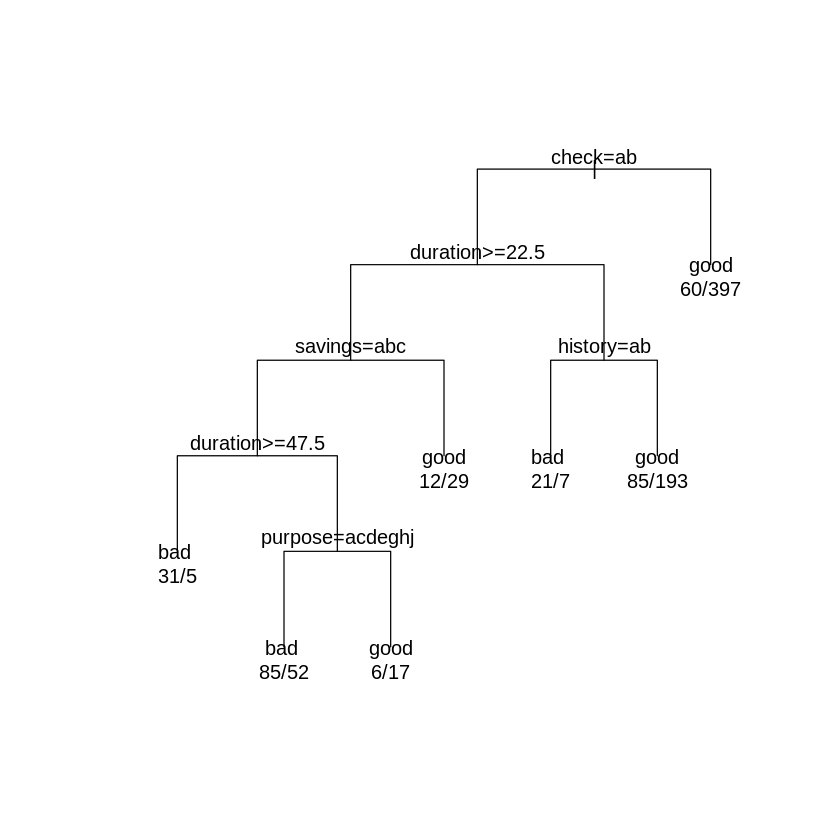

In [24]:
#가지치기 후 모형 시각화
plot(fit.prun.german, uniform=T, compress=T, margin=0.1)
text(fit.prun.german, use.n = T, com = "blue")

설명
>
* 가장 아래 분할점 purpose=acdeghj : purpose 변수의 범주값 중 알파벳 순서로 1, 3, 4, 5, 7, 8, 10번째 범주값임(A40, A410, A42, A43, A45, A46, A49)
* 또한 오분류울이 낮은 것중 최소 오분류율 표준편차의 1배 범위 내에 있는 것은 1-s.e법칙에 따라 선택하는 경우도 있다(가지치기 횟수를 줄이기 위해 사용)

## 목표변수의 분류예측치 & 정확도 평가
* 참고 : newdata에서 같은 데이터를 사용해 분류예측치를 구하였고 동일한 형식의 새로운 데이터를 사용하면 예측치를 구하게됨
* type = class : 분류나무의 집단값 예측결과를 의미함
* type = "vector" : 회귀나무일경우 사용함함

In [26]:
#분류예측치 구하기
pred.german <- predict(fit.prun.german, newdata = german, type= "class")

In [27]:
#오분류표
tab = table(y, pred.german, dnn = c("Actual", "Predicted"))
print(tab)

      Predicted
Actual bad good
  bad  137  163
  good  64  636


In [28]:
#오분류울
1-sum(diag(tab))/(sum(tab))

[1] 0.227

## 훈련/검증데이터를 이용한 분류예측치 & 정확도평가

In [29]:
#분류나무 평가하기
set.seed(1234)

#german데이터의 70%를 훈련데이터 / 30%를 검증데이터로 랜분류나무 평가하기
i = sample(1:nrow(german), round(nrow(german)*0.7))
german.train <- german[i, ]
german.test <- german[-i,]

#훈련데이터로 학습
fit.german.train <- rpart(y ~ .,data = german.train, method="class", control = my.control.german)
printcp(fit.german.train)


Classification tree:
rpart(formula = y ~ ., data = german.train, method = "class", 
    control = my.control.german)

Variables actually used in tree construction:
 [1] age         check       credit      duration    employment  history    
 [7] housing     installment job         others      personal    property   
[13] purpose     residence   residpeople savings     telephone  

Root node error: 209/700 = 0.29857

n= 700 

          CP nsplit rel error  xerror     xstd
1  0.0861244      0   1.00000 1.00000 0.057932
2  0.0382775      3   0.74163 0.82297 0.054499
3  0.0167464      4   0.70335 0.77033 0.053274
4  0.0159490      6   0.66986 0.79426 0.053843
5  0.0143541      9   0.62201 0.80383 0.054065
6  0.0119617     12   0.57895 0.84211 0.054920
7  0.0095694     14   0.55502 0.85167 0.055125
8  0.0076555     28   0.40670 0.85167 0.055125
9  0.0071770     33   0.36842 0.86603 0.055428
10 0.0059809     37   0.33971 0.89474 0.056012
11 0.0047847     41   0.31579 0.90431 0.056201
12 0.0

해석
>
* 데이터의 70%를 랜덤하게 훈련데이터로 할당하고 30%는 검증데이터로 할당
* 훈련데이터로 의사결정나무 적합시키고, 비용복잡함수에 의한 다양항 크기의 나무구조를 출력함
* 교차타당성 최소오류율은 3번째 나무구조임(0.77033)

In [30]:
#cp = 0.0167464 로 훈련데이터의 나무구조 가지치기
fit.prun.german.train <- prune(fit.german.train, cp = 0.0167464)
print(fit.prun.german.train)

n= 700 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 700 209 good (0.29857143 0.70142857)  
   2) check=A11,A12 360 168 good (0.46666667 0.53333333)  
     4) history=A30,A31 45  10 bad (0.77777778 0.22222222) *
     5) history=A32,A33,A34 315 133 good (0.42222222 0.57777778)  
      10) duration>=27.5 81  26 bad (0.67901235 0.32098765) *
      11) duration< 27.5 234  78 good (0.33333333 0.66666667)  
        22) credit>=8472 8   0 bad (1.00000000 0.00000000) *
        23) credit< 8472 226  70 good (0.30973451 0.69026549) *
   3) check=A13,A14 340  41 good (0.12058824 0.87941176)  
     6) purpose=A49 36  12 good (0.33333333 0.66666667)  
      12) employment=A71,A72 7   0 bad (1.00000000 0.00000000) *
      13) employment=A73,A74,A75 29   5 good (0.17241379 0.82758621) *
     7) purpose=A40,A41,A42,A43,A44,A45,A46,A48 304  29 good (0.09539474 0.90460526) *


In [31]:
#30%의 검증데이터로 분류예측치 구하기
p.german.test = predict(fit.prun.german.train, newdata=german.test, type = "class")
tab = table(german.test$y, p.german.test, dnn = c("Actual", "Predicted"))
print(tab)

      Predicted
Actual bad good
  bad   25   66
  good  29  180


In [32]:
# 오분류율
1- sum(diag(tab))/sum(tab)

[1] 0.3166667

#회귀나무모형